---
title: "Joint Probability"
toc: true
---

## Joint Probability $P(A, B)$

Joint probability is the probability of two events occurring together.The joint probability is usually denoted by $P(A, B)$, which is shorthand for $P(A \wedge B)$ read as _Probability of $A$ AND $B$._

Note that $P(A, B) = P(B, A)$ since $A \wedge B = B \wedge A$.

For example, if we are rolling two dice, the joint probability is the probability of rolling a 1 on the first die and a 2 on the second die. 

In Data Science, we rarely know the true joint probability. Instead, we estimate the joint probability from data. We will talk more about this when we talk about Statistics. 


In [ ]:
joint_probs = pd.read_csv('../data/experiment_probs.csv')
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


In [ ]:
joint_probs['P(C, D)'].sum()

1.0

Note that sum of joint probabilities is 1 i.e. $\sum P(C, D) = 1$ at the end of the day, since the sum of all probabilities is 1. 

The following three are all true at the same time: 

1. $\sum_{C, D} P(C, D) = 1$ where $P(C, D)$ is a probability table with 12 rows and 3 columns: $C, D, P(C, D)$.


2. $\sum_{C} P(C) = 1$ where $P(C)$ is a probability table with 2 rows (${H, T}$) and 2 columns: $C, P(C)$.


3. $\sum_{D} P(D) = 1$ where $P(D)$ is a probability table with 6 rows (${1, 2, 3, 4, 5, 6}$) and 2 columns: $D, P(D)$.


In [ ]:
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


In [ ]:
joint_probs["CD_vals"] = joint_probs.apply(lambda x: "C=%s and D=%s" % (x['C'], x['D']), axis=1)

In [ ]:
joint_probs

,C,D,"P(C, D)",CD_vals
0,H,1,0.24,C=H and D=1
1,H,2,0.13,C=H and D=2
2,H,3,0.09,C=H and D=3
3,H,4,0.01,C=H and D=4
4,H,5,0.03,C=H and D=5
5,H,6,0.01,C=H and D=6
6,T,1,0.19,C=T and D=1
7,T,2,0.09,C=T and D=2
8,T,3,0.13,C=T and D=3
9,T,4,0.04,C=T and D=4


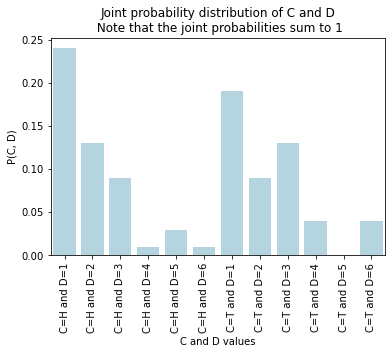

In [ ]:
axs = sns.barplot(data=joint_probs, x="CD_vals", y="P(C, D)", color="lightblue");
axs.set(title="Joint probability distribution of C and D\n Note that the joint probabilities sum to 1", \
        xlabel="C and D values", \
        ylabel="P(C, D)");
plt.xticks(rotation=90);



## Marginal Probability $P(A)$

Because most data sets are multi-dimensional i.e. involving multiple random variables, we can sometimes find ourselves in a situation where we want to know the joint probability $P(A, B)$ of two random variables $A$ and $B$ but we don't know $P(A)$ or $P(B)$. In such cases, we compute the **marginal probability** of one variable from joint probability over multiple random variables. 

Marginalizing is the process of summing over one or more variables (say B) to get the probability of another variable (say A). This summing takes place over the joint probability table.

$$ P(A) = \sum_{b \in \Omega_B} P(A, B=b) $$


In [ ]:
P_C = joint_probs.groupby('C').sum()['P(C, D)']
P_C.name = 'P(C)'
P_D = joint_probs.groupby('D').sum()['P(C, D)']
P_D.name = 'P(D)'
P_C

C
H    0.51
T    0.49
Name: P(C), dtype: float64

In [ ]:
P_D, P_D.sum()

(D
 1    0.43
 2    0.22
 3    0.22
 4    0.05
 5    0.03
 6    0.05
 Name: P(D), dtype: float64,
 1.0)

In [ ]:
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


In [ ]:
joint_probs

,C,D,"P(C, D)"
0,H,1,0.24
1,H,2,0.13
2,H,3,0.09
3,H,4,0.01
4,H,5,0.03
5,H,6,0.01
6,T,1,0.19
7,T,2,0.09
8,T,3,0.13
9,T,4,0.04


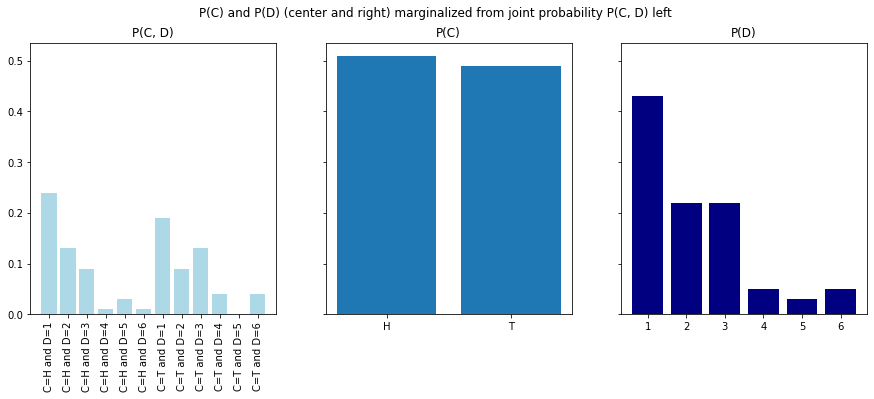

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].bar(joint_probs["CD_vals"], joint_probs["P(C, D)"], color="lightblue");
axs[1].bar(P_C.index, P_C);
axs[2].bar(P_D.index, P_D, color="navy");

axs[0].tick_params('x', labelrotation=90)

axs[0].set_title("P(C, D)");
axs[1].set_title("P(C)");
axs[2].set_title("P(D)");

fig.suptitle("P(C) and P(D) (center and right) marginalized from joint probability P(C, D) left");

As we look at new concepts in probability, it is important to stay mindful of i) what the probability sums to ii) what are the dimensions of the table that represents the probability.

You can see from the cell below that the dimensions of marginal probability table is the length of the range of the variable.

You can see from the code below that both the computed marginal probabilities in add up to 1. 

In [ ]:
P_C.sum().round(3), P_D.sum().round(3)

(1.0, 1.0)

## Independent Random Variables

Random variables can be either independent or dependent. If two random variables are independent, then the value of one random variable does not affect the value of the other random variable. 

For example, if we are rolling two dice, we can use two random variables to represent the numbers that we roll. The two random variables are independent because the value of one die does not affect the value of the other die. If two random variables are dependent, then the value of one random variable does affect the value of the other random variable. For example, if we are measuring the temperature and the humidity, we can use two random variables to represent the temperature and the humidity. The two random variables are dependent because the temperature affects the humidity and the humidity affects the temperature.

More formally, **two random variables $X$ and $Y$ are independent if and only if $P(X, Y) = P(X) \cdot P(Y)$**.

In [ ]:
P_C.name = "P(C)"
P_D.name = "P(D)"
merged = pd.merge(joint_probs, P_C, on='C')
merged = pd.merge(merged,      P_D, on='D')
merged

,C,D,"P(C, D)",P(C),P(D)
0,H,1,0.24,0.51,0.43
1,T,1,0.19,0.49,0.43
2,H,2,0.13,0.51,0.22
3,T,2,0.09,0.49,0.22
4,H,3,0.09,0.51,0.22
5,T,3,0.13,0.49,0.22
6,H,4,0.01,0.51,0.05
7,T,4,0.04,0.49,0.05
8,H,5,0.03,0.51,0.03
9,T,5,0.00,0.49,0.03


In [ ]:
merged['P(C) P(D)'] = merged['P(C)'] * merged['P(D)']
merged

,C,D,"P(C, D)",P(C),P(D),P(C) P(D)
0,H,1,0.24,0.51,0.43,0.2193
1,T,1,0.19,0.49,0.43,0.2107
2,H,2,0.13,0.51,0.22,0.1122
3,T,2,0.09,0.49,0.22,0.1078
4,H,3,0.09,0.51,0.22,0.1122
5,T,3,0.13,0.49,0.22,0.1078
6,H,4,0.01,0.51,0.05,0.0255
7,T,4,0.04,0.49,0.05,0.0245
8,H,5,0.03,0.51,0.03,0.0153
9,T,5,0.00,0.49,0.03,0.0147


In [ ]:
merged[['P(C, D)', 'P(C) P(D)']].round(2)

,"P(C, D)",P(C) P(D)
0,0.24,0.22
1,0.19,0.21
2,0.13,0.11
3,0.09,0.11
4,0.09,0.11
5,0.13,0.11
6,0.01,0.03
7,0.04,0.02
8,0.03,0.02
9,0.00,0.01


The two random variables $C$ and $D$ therefore are NOT independent because $P(C, D) \neq P(C) \cdot P(D)$.

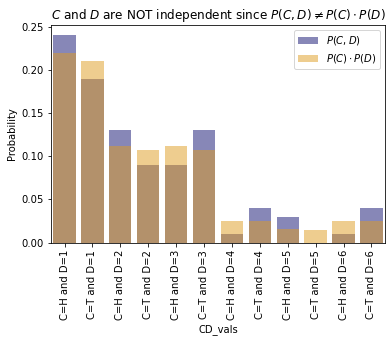

In [ ]:
sns.barplot(data=merged, x="CD_vals", y="P(C, D)", color="navy", alpha=0.5, label="$P(C, D)$");
sns.barplot(data=merged, x="CD_vals", y="P(C) P(D)", color="orange", alpha=0.5, label="$P(C)\cdot P(D)$");
plt.xticks(rotation=90);
plt.ylabel("Probability");
plt.legend();
plt.title("$C$ and $D$ are NOT independent since $P(C, D) \\neq P(C) \cdot P(D)$");